In [1]:
from PIL import Image


image_path = 'basemodelado.jpeg'
image = Image.open(image_path)

# Convertir a blanco y negro
bw_image = image.convert('L')

# Guardar la imagen convertida
bw_image.save('basemodelado_bw.jpeg')
bw_image.show()


In [2]:
bw_image.size


(960, 1280)

In [3]:
import numpy as np
bw_array = np.array(bw_image)


bw_array.shape

(1280, 960)

In [4]:
bw_image.show()

In [5]:
from PIL import Image
import numpy as np

image_path = 'basemodelado_bw.jpeg'
image = Image.open(image_path).convert('L')
image_array = np.array(image)


threshold = 100  # Ajustar el umbral para extraer puntos donde el color es negro dado en escala de grises
target_points = np.column_stack(np.where(image_array < threshold))
target_points = np.hstack((target_points, np.zeros((target_points.shape[0], 1))))  # Añadir z=0

print("Total puntos objetivo:", target_points.shape[0])


Total puntos objetivo: 21191


In [6]:
from treesim import gen_simtree
from scipy.optimize import least_squares
import numpy as np

max_vals = np.max(target_points, axis=0)
max_vals[max_vals == 0] = 1  

target_points_normalized = target_points / max_vals

print(target_points_normalized)

# Función de error para el ajuste de mínimos cuadrados
def error_func(params, target_points, generated_points):
    scale, tx, ty, tz, theta_x, theta_y, theta_z = params
    # Aplica transformaciones de escala y traslación a los puntos generados
    transformed_points = generated_points * scale
    transformed

generated_points = gen_simtree(Np=target_points.shape[0])

def error_func(params, target_points, generated_points):
    scale, tx, ty, tz, theta_x, theta_y, theta_z = params
    # Aplicar escala y traslaciones
    transformed_points = generated_points * scale
    transformed_points[:, 0] += tx
    transformed_points[:, 1] += ty
    transformed_points[:, 2] += tz
    # Aplicar rotaciones (en 3D)
    # Crear matrices de rotación
    # [...] Define rotación en función de theta_x, theta_y, theta_z
    
    # Calcular distancia
    error = transformed_points - target_points
    return np.ravel(error)

# Parámetros iniciales [escala, tx, ty, tz, theta_x, theta_y, theta_z]
initial_params = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


generated_points_xyz = generated_points[:, :3]  

# Optimización de mínimos cuadrados
result = least_squares(error_func, initial_params, args=(target_points, generated_points_xyz))


final_params = result.x


[[0.10995671 0.44592953 0.        ]
 [0.10995671 0.52612394 0.        ]
 [0.10995671 0.79465371 0.        ]
 ...
 [0.9991342  0.5309842  0.        ]
 [0.9991342  0.53219927 0.        ]
 [1.         0.5309842  0.        ]]


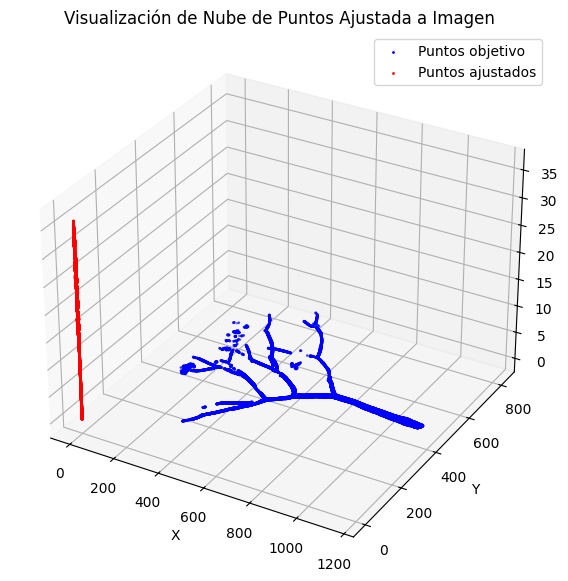

In [7]:
#Graficación 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Visualizar los puntos objetivo (imagen) en color azul
ax.scatter(target_points[:, 0], target_points[:, 1], target_points[:, 2], c='blue', s=1, label="Puntos objetivo")

# Visualizar los puntos generados ajustados en color rojo
ax.scatter(generated_points_xyz[:, 0], generated_points_xyz[:, 1], generated_points_xyz[:, 2], c='red', s=1, label="Puntos ajustados")

# Configurar etiquetas y título
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Visualización de Nube de Puntos Ajustada a Imagen")

ax.legend()

plt.show()


In [8]:
import numpy as np
from scipy.optimize import curve_fit
from treesim import gen_simtree

# Función de simulación ajustable con verificación de la forma de la salida
def simulacion_ajustada(x, *params):
    model_params = {
        'height_range': [params[0], params[1]],
        'diam_range': [params[2], params[3]],
        'split_prob': params[4],
        'split_height_range': [0.15, 0.5],
        'num_branches': [60, 100],
        'min_can_height': [0.2, 0.5],
        'max_can_width': 7.0,
        'max_can_width_height': [0.4, 0.8],
        'tree_top_dist': 2.5,
        'tree_mid_dist': 0.5,
        'foliage_noise': 0.5,
    }
    puntos = gen_simtree(model_params=model_params)
    result = np.full(x.shape, np.mean(puntos[:, 2]), dtype=np.float64)

    print("Forma de la salida de simulacion_ajustada:", result.shape)
    print("Tipo de datos de la salida:", result.dtype)
    return result


params_iniciales = [30, 50, 0.5, 1, 0.5]

# Reducir `xdata` y `target_points_normalized` a un solo valor para pruebas
xdata = np.array([0], dtype=np.float64)
target_points_normalized = np.array([1.0], dtype=np.float64)  # Ajuste simple a un solo valor objetivo

# Ajuste de los parámetros
opt_params, _ = curve_fit(simulacion_ajustada, xdata, target_points_normalized, p0=params_iniciales)
print(f"Parámetros óptimos: {opt_params}")





Forma de la salida de simulacion_ajustada: (1,)
Tipo de datos de la salida: float64


TypeError: Improper input: func input vector length N=5 must not exceed func output vector length M=1